In [50]:
import pandas as pd 
import numpy as np

In [51]:
df = pd.read_csv("lol.csv")

In [141]:
a = list(df["WD_HR"])
print(a)

[69.0, 67.0, 63.0, 63.0, 69.0, 68.0, 74.0, 66.0, 71.0, 73.0, 69.0, 73.0, 71.0, 67.0, 69.0, 71.0, 68.0, 68.0, 73.0, 84.0, 88.0, 81.0, 79.0, 71.0, 70.0, 79.0, 79.0, 63.0, 66.0, 81.0, 77.0, 75.0, 82.0, 77.0, 69.0, 67.0, 68.0, 67.0, 70.0, 66.0, 70.0, 77.0, 77.0, 83.0, 83.0, 88.0, 87.0, 84.0, 84.0, 87.0, 81.0, 75.0, 72.0, 77.0, 75.0, 59.0, 62.0, 68.0, 75.0, 92.0, 90.0, 81.0, 86.0, 84.0, 103.0, 61.0, 49.0, 47.0, 79.0, 78.0, 81.0, 237.0, 246.0, 233.0, 250.0, 252.0, 255.0, 253.0, 248.0, 241.0, 217.0, 225.0, 247.0, 103.0, 351.0, 347.0, 337.0, 357.0, 343.0, 351.0, 341.0, 24.0, 266.0, 229.0, 265.0, 151.0, 206.0, 235.0, 250.0, 238.0, 245.0, 245.0, 245.0, 241.0, 241.0, 234.0, 60.0, 358.0, 21.0, 307.0, 138.0, 30.0, 36.0, 38.0, 246.0, 242.0, 240.0, 245.0, 238.0, 245.0, 253.0, 242.0, 236.0, 248.0, 283.0, 296.0, 294.0, 161.0, 94.0, 31.0, 42.0, 85.0, 87.0, 73.0, 70.0, 70.0, 78.0, 74.0, 78.0, 76.0, 90.0, 68.0, 72.0, 84.0, 87.0, 87.0, 87.0, 88.0, 87.0, 89.0, 87.0, 87.0, 85.0, 84.0, 37.0, 78.0, 81.0, 82.0,

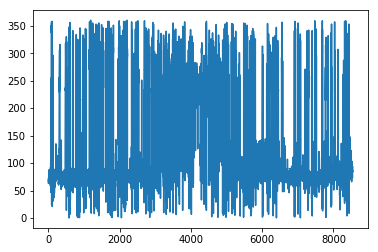

In [142]:
t = [0 for i in range(len(a))]
plt.plot(a)

In [53]:
x=df.iloc[:,1:7]
y=df.iloc[:,8]

In [186]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True, input_shape=(1,6)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=42)

/home/the_daemon_lord/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/the_daemon_lord/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


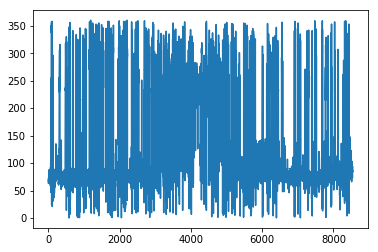

In [177]:
# Reshape the data between -1 and 1 and to 3D
plt.plot(y)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_test)

In [188]:
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_val_resaped = x_valid_scaled.reshape((x_valid_scaled.shape[0], 1, x_valid_scaled.shape[1]))

In [189]:
history = model_lstm.fit(x_train_reshaped, y_train, validation_data=(x_val_resaped, y_test),epochs=100, batch_size=12, verbose=2, shuffle=False)
y_pre = model_lstm.predict(x_val_resaped)

Train on 5725 samples, validate on 2820 samples
Epoch 1/100
 - 2s - loss: 6007.2979 - acc: 0.0052 - val_loss: 6666.4309 - val_acc: 0.0053
Epoch 2/100
 - 1s - loss: 6006.7153 - acc: 0.0056 - val_loss: 6667.5019 - val_acc: 0.0053
Epoch 3/100
 - 1s - loss: 6006.1390 - acc: 0.0054 - val_loss: 6666.7460 - val_acc: 0.0050
Epoch 4/100
 - 1s - loss: 6005.5391 - acc: 0.0051 - val_loss: 6667.4740 - val_acc: 0.0050
Epoch 5/100
 - 1s - loss: 6004.9814 - acc: 0.0051 - val_loss: 6666.5486 - val_acc: 0.0064
Epoch 6/100
 - 1s - loss: 6004.3955 - acc: 0.0051 - val_loss: 6667.6654 - val_acc: 0.0064
Epoch 7/100
 - 1s - loss: 6003.8304 - acc: 0.0051 - val_loss: 6666.7954 - val_acc: 0.0067
Epoch 8/100
 - 1s - loss: 6003.2449 - acc: 0.0051 - val_loss: 6667.9312 - val_acc: 0.0060
Epoch 9/100
 - 2s - loss: 6002.6621 - acc: 0.0052 - val_loss: 6667.2461 - val_acc: 0.0060
Epoch 10/100
 - 1s - loss: 6002.0912 - acc: 0.0051 - val_loss: 6668.3741 - val_acc: 0.0057
Epoch 11/100
 - 1s - loss: 6001.4877 - acc: 0.0051 

Epoch 91/100
 - 1s - loss: 5952.5211 - acc: 0.0056 - val_loss: 6692.4502 - val_acc: 0.0057
Epoch 92/100
 - 1s - loss: 5951.8989 - acc: 0.0056 - val_loss: 6694.0997 - val_acc: 0.0060
Epoch 93/100
 - 1s - loss: 5951.2266 - acc: 0.0058 - val_loss: 6694.1243 - val_acc: 0.0064
Epoch 94/100
 - 1s - loss: 5950.5953 - acc: 0.0061 - val_loss: 6695.7253 - val_acc: 0.0064
Epoch 95/100
 - 1s - loss: 5949.9502 - acc: 0.0061 - val_loss: 6695.4505 - val_acc: 0.0071
Epoch 96/100
 - 1s - loss: 5949.2748 - acc: 0.0056 - val_loss: 6697.0682 - val_acc: 0.0067
Epoch 97/100
 - 1s - loss: 5948.6153 - acc: 0.0058 - val_loss: 6696.8376 - val_acc: 0.0067
Epoch 98/100
 - 1s - loss: 5948.0116 - acc: 0.0061 - val_loss: 6698.5110 - val_acc: 0.0074
Epoch 99/100
 - 1s - loss: 5947.3664 - acc: 0.0061 - val_loss: 6698.3001 - val_acc: 0.0074
Epoch 100/100
 - 1s - loss: 5946.6656 - acc: 0.0065 - val_loss: 6699.8819 - val_acc: 0.0078


In [169]:
a = y_test.to_list()

In [170]:
import matplotlib.pyplot as plt
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real AQI')
    plt.plot(predicted, color='blue',label='Predicted AQI')
    plt.title('Air Quality Prediction')
    plt.xlabel('Time')
    plt.ylabel('Air Quality')
    plt.legend()
    plt.show()


array([[202.90112],
       [102.87244],
       [106.27736],
       ...,
       [164.49274],
       [217.43121],
       [104.56044]], dtype=float32)

In [171]:
a

[229.0,
 80.0,
 75.0,
 79.0,
 61.0,
 12.0,
 266.0,
 220.0,
 42.0,
 71.0,
 282.0,
 135.0,
 319.0,
 152.0,
 127.0,
 65.0,
 234.0,
 289.0,
 75.0,
 137.0,
 123.0,
 86.0,
 81.0,
 78.0,
 320.0,
 79.0,
 82.0,
 103.0,
 93.0,
 85.0,
 234.0,
 208.0,
 299.0,
 222.0,
 68.0,
 113.0,
 86.0,
 237.0,
 315.0,
 88.0,
 59.0,
 79.0,
 83.0,
 83.0,
 165.0,
 70.0,
 153.0,
 247.0,
 85.0,
 20.0,
 86.0,
 329.0,
 238.0,
 80.0,
 113.0,
 316.0,
 86.0,
 249.0,
 83.0,
 256.0,
 72.0,
 69.0,
 69.0,
 240.0,
 69.0,
 103.0,
 272.0,
 112.0,
 68.0,
 88.0,
 111.0,
 127.0,
 66.0,
 76.0,
 81.0,
 99.0,
 101.0,
 81.0,
 68.0,
 130.0,
 88.0,
 231.0,
 83.0,
 73.0,
 151.0,
 79.0,
 74.0,
 61.0,
 103.0,
 233.0,
 285.0,
 79.0,
 307.0,
 55.0,
 64.0,
 58.0,
 54.0,
 83.0,
 82.0,
 77.0,
 63.0,
 341.0,
 64.0,
 62.0,
 244.0,
 234.0,
 246.0,
 70.0,
 83.0,
 221.0,
 88.0,
 109.0,
 71.0,
 226.0,
 110.0,
 228.0,
 224.0,
 329.0,
 59.0,
 70.0,
 85.0,
 88.0,
 92.0,
 94.0,
 91.0,
 115.0,
 71.0,
 81.0,
 231.0,
 240.0,
 63.0,
 64.0,
 239.0,
 87.0,
 75

In [180]:
y_pre

array([[192.30092 ],
       [ 97.55058 ],
       [ 94.90487 ],
       ...,
       [147.15175 ],
       [219.62189 ],
       [ 97.806435]], dtype=float32)

In [184]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = mean_squared_error(test, predicted)
    print("The root mean squared error is {}.".format(rmse))

In [185]:
return_rmse(y_pre,y_test)

The root mean squared error is 6667.493545465311.


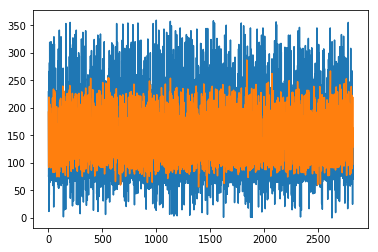

In [183]:
plt.plot(y_test.to_list())
plt.plot(y_pre)
plt.show()